* Name:Sainee Panda (2241016106)  
* Name:Swati Panda (2241016131)   
* Name:Anisha Subudhi (2241019564)

#Downloading Animal Dataset from kaggle

In [6]:
from google.colab import files
uploaded = files.upload()


Saving kaggle (2).json to kaggle (2).json


In [7]:
import os
import shutil

# Automatically get the uploaded filename (e.g., 'kaggle(2).json')
filename = next(iter(uploaded))  # Gets the first (and usually only) file uploaded

# Rename it to kaggle.json
os.rename(filename, 'kaggle.json')

# Move it to the required directory
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Set appropriate permissions
os.chmod('/root/.kaggle/kaggle.json', 600)


Installing Kaggle Datsets

In [8]:
!kaggle datasets list


ref                                                          title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance                   19512  2025-04-12 10:49:08.663000          19730        337  1.0              
adilshamim8/cost-of-international-education                  Cost of International Education                          18950  2025-05-07 15:41:53.213000           2752         44  1.0              
fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid      Heart Attack Dataset                                     16250  2025-04-30 21:58:22.740000           3633         63  1.0              
ivankmk/thousan

In [9]:
!pip install kaggle


Downloading Animal Dataset

In [10]:
!kaggle datasets download -d alessiocorrado99/animals10


Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0


Unzip the dataset

In [11]:
!unzip animals10.zip -d /content/animals10/


Streaming output truncated to the last 5000 lines.
  inflating: /content/animals10/raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: /content/animals10/raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: /content/animals10/raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: /content/animals10/raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: /content/animals10/raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: /content/animals10/raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: /content/animals10/raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: /content/animals10/raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: /content/animals10/raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: /content/animals10/raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: /content/animals10/raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: /content/ani

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Animals-10 dataset
!kaggle datasets download -d alessiocorrado99/animals10
!unzip animals10.zip -d data/


Streaming output truncated to the last 5000 lines.
  inflating: data/raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: data/raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: data/raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: data/raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: data/raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: data/raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: data/raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: data/raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: data/raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: data/raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: data/raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: data/raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: data/raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: data/raw-img/ragno/OIP-MiV

#Implementaion

Importing the libraries

In [5]:
import os
import time
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Configurating the data

In [13]:

zip_path = "/content/animals10.zip"
extract_path = "/content/extracted_data"
dataset_folder_name = "raw-img"
image_size = (224, 224)
batch_size = 32
epochs = 10
seed = 42
validation_split = 0.2

STEP 1:-Extracting the Dataset

In [14]:

print(f"Zip file path: {zip_path}")
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"Zip file not found at: {zip_path}")

if not os.path.exists(extract_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print("Zip extracted successfully.")
    except zipfile.BadZipFile:
        raise zipfile.BadZipFile(f"Invalid zip file: '{zip_path}'")

dataset_path = os.path.join(extract_path, dataset_folder_name)


Zip file path: /content/animals10.zip
Zip extracted successfully.


Loading Image Datasets

In [15]:

print("Loading image datasets...")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_dataset.class_names
num_classes = len(class_names)

Loading image datasets...
Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


STEP 3: Normalizing the data

In [16]:

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)


STEP 4:- BUILDING OF THE MODEL




ZFNet Model

In [1]:
def build_zfnet():
    return Sequential([
        Conv2D(96, (7, 7), strides=2, activation='relu', input_shape=(*image_size, 3)),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(256, (5, 5), activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(384, (3, 3), activation='relu'),
        Conv2D(384, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

VGG16 Model

In [2]:
def build_vgg16():
    base = VGG16(include_top=False, weights='imagenet', input_shape=(*image_size, 3))
    for layer in base.layers:
        layer.trainable = False
    x = Flatten()(base.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    return Model(inputs=base.input, outputs=output)


GOOGLeNet Model

In [3]:
def build_googlenet():
    base = InceptionV3(include_top=False, weights='imagenet', input_shape=(*image_size, 3))
    for layer in base.layers:
        layer.trainable = False
    x = AveragePooling2D(pool_size=(5, 5))(base.output)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.4)(x)
    output = Dense(num_classes, activation='softmax')(x)
    return Model(inputs=base.input, outputs=output)

 STEP 5: Compile, Train, Evaluate

In [17]:
# STEP 5: Compile, Train, Evaluate
def compile_and_train(model, name):
    print(f"\nTraining {name}...")
    model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    start = time.time()
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=[EarlyStopping(patience=3)]
    )
    end = time.time()
    print(f"{name} training completed in {end - start:.2f}s")
    return history, end - start

Step 6:-Training Models and Plotting Accuracy and Loss

Zip file path: /content/animals10.zip
Loading image datasets...
Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training ZFNet...
Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 96s 127ms/step - accuracy: 0.2634 - loss: 2.0572 - val_accuracy: 0.4915 - val_loss: 1.4624
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accuracy: 0.4992 - loss: 1.4637 - val_accuracy: 0.6157 - val_loss: 1.1527
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.6065 - loss: 1.1542 - val_accuracy: 0.6762 - val_loss: 0.9700
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 73s 111ms/step - accuracy: 0.6747 - loss: 0.9592 - val_accuracy: 0.7003 - val_loss: 0.9163
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 86s 118ms/step - accuracy: 0.7363 - loss: 0.7781 - val_accuracy: 0.6993 - val_loss: 0.9553
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.7931 - loss: 0.6077 - val_accuracy: 0.6883 - val_loss: 1.0590
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accuracy: 0.8404 - loss: 0.4594 - va

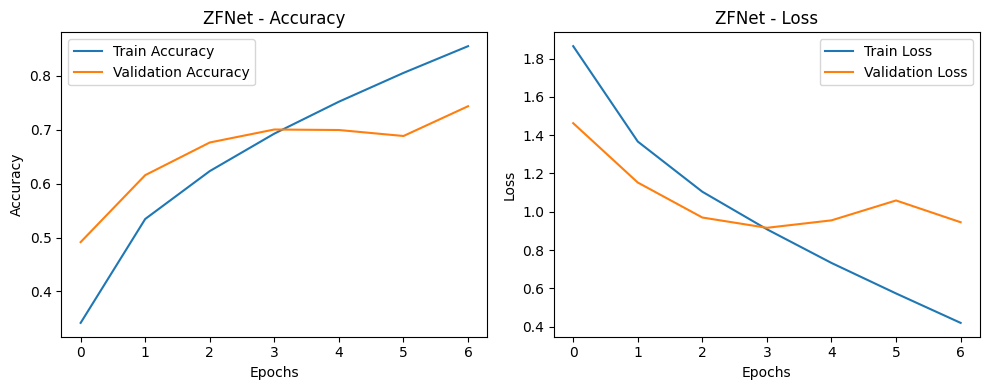

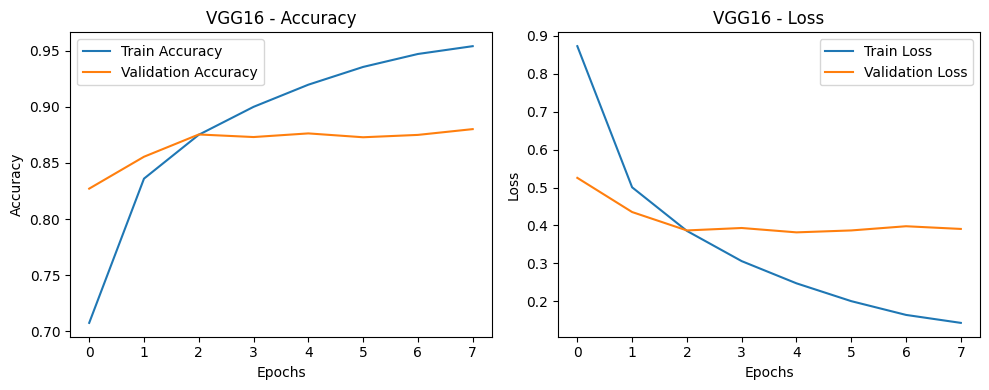

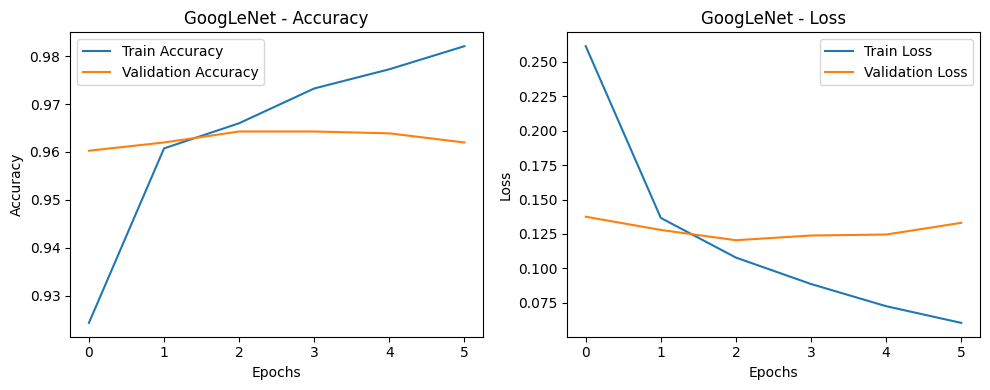

In [ ]:
#Train Model
models = {
    "ZFNet": build_zfnet(),
    "VGG16": build_vgg16(),
    "GoogLeNet": build_googlenet()
}

results = {}
for name, model in models.items():
    history, time_taken = compile_and_train(model, name)
    results[name] = {'history': history, 'time': time_taken}


for name, result in results.items():
    hist = result['history']
    plt.figure(figsize=(10, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
